# Network Intrusion Data Analysis
The following dataset analysis is completed with the goal of creating a model on detecting possible network anomalies
We will be performing this analysis on the following dataset (https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection/data)
This dataset contains TCP/IP dump data for a number of simulated network intrusions on a network setup like a typical AirForce LAN


In [1]:
# Here we install necesary libraries
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

Training an AI model almost always involves the same steps. These include:

1) Loading and preprocessing the data.
3) Splitting the data into training and test sets.
2) Selecting an appropriate model based on the data.
4) Training the model using the training data.
5) Evaluating the trained model on the test set.
6) Fine-tuning the hyperparameters.



In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Data Pre Processing
Our dataset contains 42 columns describing data collected from networks of different types
We will be examining the data to learn about the different columns and find any redundant columns.

Our dataset has samples of network traffic simulated in a military network environment. This includes 'normal' network traffic and 'anomaly' network traffic

In [37]:
# Load the train and test data from the csv
train_data = pd.read_csv("Train_data.csv")
train_data.head() # display the first 5 data samples

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [38]:
test_data = pd.read_csv("Test_data.csv")
test_data.head() # display the first 5 data samples

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [39]:
#View different data types in the train data
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [40]:
train_data = train_data.rename(columns={'class': 'label'})

In [41]:
# View datatypes for the test data
test_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [21]:
# View unique values for columns with object data types
train_data.describe(include='object')

,protocol_type,service,flag,label
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [22]:
# Find the number of missing values in the train data
total = train_data.shape[0]
missing_columns = [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train_data[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

# There are no missing values

In [23]:
# See if there are any duplicate rows in the train data
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of duplicate rows: 0


In [24]:
train_data.num_outbound_cmds.head() 

0    0
1    0
2    0
3    0
4    0
Name: num_outbound_cmds, dtype: int64

In [25]:
# Check unique values in num_outbound_cmds column
train_data.num_outbound_cmds.unique()

array([0], dtype=int64)

In [26]:
# The column 'num_outbound_cmds' has only one unique value, so we can drop it
train_data.drop(['num_outbound_cmds'], axis=1, inplace=True)
test_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

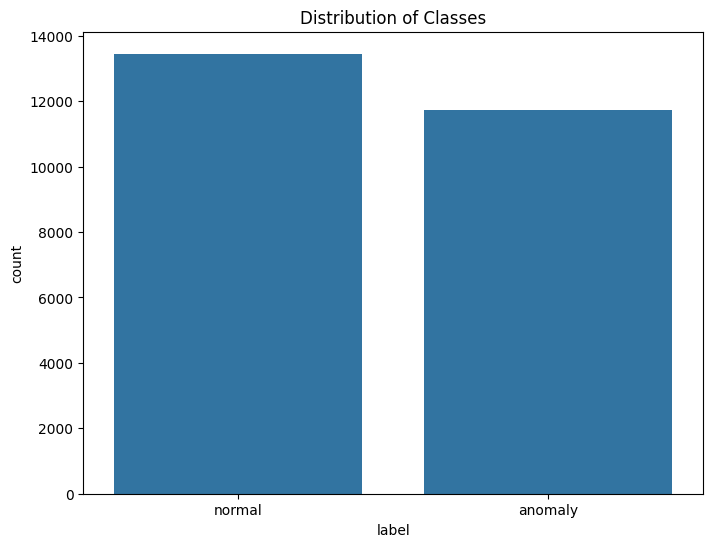

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_data)
plt.title('Distribution of Classes')
plt.show()
# here we can see that roughly 12 thousand samples are 0, these data samples are classified as network intrusion
# we see that almost 14 thousand samples are not classified as network intrusion

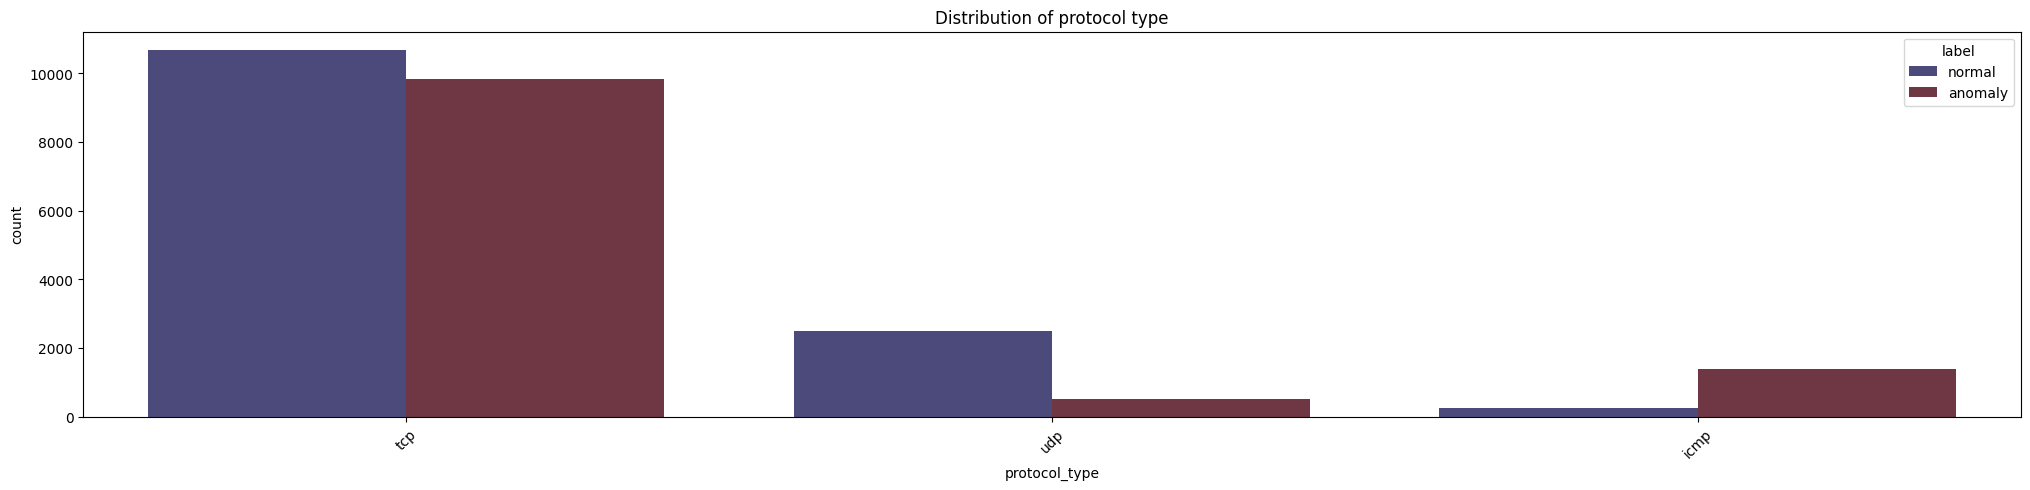

In [28]:
for category in ['protocol_type']:
    plt.figure(figsize=(25, 5))  # This line will execute for every iteration
    sns.countplot(x=category, data=train_data, hue='label', palette=("icefire"))
    plt.title(f'Distribution of protocol type')
    plt.xticks(rotation=45)
    plt.show()


Internet Control Message Protocol (ICMP) is used for reporting errors and performing network diagnostics.
Many ICMP vulnerabilities: ICMP Redirect Attack, ICMP Flood attack

In [29]:
X_train = train_data.drop(columns=['label'])  # Features
y_train = train_data['label']  # Target

In [30]:
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])

In [31]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=77)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=77)
model.fit(X_train, y_train)
val_predictions = model.predict(X_test)
val_accuracy = accuracy_score(y_test, val_predictions)
print("test Accuracy:", val_accuracy)

test Accuracy: 0.9982139313355824


Imagine trying to find the tastiest combination of toppings for pizza, but there are so many toppings to choose from. GridSearchCV is like having a taste test with all the possible combinations.

First, you make a list of all the toppings you want to try. Then, you put them into groups based on how they might go together(Such as proteins: chicken or beef, Veggies: Spinach, greenpepper, or olives etc). Each group is like a set of choices for your pizza, and GridSearchCV tries all the combinations to see which one tastes the best.

After trying each combination, GridSearchCV tells you which one was the tastiest. It helps you find the perfect combination of toppings for your pizza without having to try them all yourself.

Although doing all of this is possible by using for loops, it is made much simpler and easier with GridSearch.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [50, 100, 200],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]} #Store parameters as dict
rf = RandomForestClassifier(random_state=77) #Create random forest classifier, random state for recreation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy') #Perform grid search
grid_search.fit(X_train, y_train) #Fit the model onto our training data
best_rf_model = grid_search.best_estimator_ #Get the best model
test_accuracy = best_rf_model.score(X_test, y_test) #Evaluate the best model on test data

print("Test accuracy:", test_accuracy) #Print accuracy

print("Best hyperparameters:", grid_search.best_params_) #Print the best hyperparameters


Test accuracy: 0.9980154792617583
Best hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


In [19]:
from sklearn.linear_model import LogisticRegression


logistic_parameters = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']} #Store parameters as dict
logistic = LogisticRegression(random_state=42, max_iter=1000) #Create logistic regression classifier, specify max iterations
logistic_grid_search = GridSearchCV(estimator=logistic, param_grid=logistic_parameters, cv=5, scoring='accuracy') #Perform grid search
logistic_grid_search.fit(X_train, y_train) #Fit the model onto our training data
best_logistic_model = logistic_grid_search.best_estimator_ #Get the best model
logistic_test_accuracy = best_logistic_model.score(X_test, y_test) #Evaluate the best model on our test data

print("Logistic Regression Best hyperparameters:", logistic_grid_search.best_params_) #Print the best hyperparameters


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Logistic Regression Best hyperparameters: {'C': 1, 'solver': 'liblinear'}


Logistic Regression Best hyperparameters: {'C': 1, 'solver': 'liblinear'}

In [20]:
print("Test accuracy:", logistic_test_accuracy)

Test accuracy: 0.894621948799365


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_parameters = {'C': [0.1, 1, 10],'gamma': [0.1, 0.01, 0.001],'kernel': ['linear', 'rbf']} #Dict with parameters
svm = SVC(random_state=42) #Create classifier
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_parameters , cv=5, scoring='accuracy') #Instantiate the GridSearchCV objects
svm_grid_search.fit(X_train, y_train) #Fit the model onto our data
best_svm_model = svm_grid_search.best_estimator_ #Get best model
svm_test_accuracy = best_svm_model.score(X_test, y_test) #Accuracy of the model

print("SVM Test accuracy:", svm_test_accuracy) #Print accuracy

print("SVM Best hyperparameters:", svm_grid_search.best_params_)#Print best parameters


SVC's fit algorithm is O(n^2) at best, so it is extremely slow. I tried reducing the parameters and the k folds to 2 but it was still processing at 598minutes (Almost 10 hours) when I decided to interupt the kernel. 

I was unable to process it on my desktop because my monitor is broken.

In [35]:
from sklearn.svm import SVC

svm_model = SVC(random_state=77)
svm_model.fit(X_train, y_train)
test_predictions = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5314546537011312
